# TP1: Outils pour le TALN

* Cours: Traitement du langage naturel
* Auteur: Ygor GALLINA
* Date: Janvier 2024

## Préambule

Le but de ce TP est d’appréhender et de prendre en main les outils de traitement automatique de la langue existant pour traiter des données textuelles.

Notre cas d’usage est d'analyser les discours de nouvelle année des présidents de la république française. Ces discours sont disponible sur la plateforme [vie-publique.fr](https://www.vie-publique.fr/qui-sommes-nous) qui recense (entre autre) les discours provenant du gouvernement.

### Google Collab

Si vous executez ce notebook avec Google Collab exécutez la commande suivante pour connaître le pays dans lequel se trouve le serveur qui exécute votre code. Naviguez ensuite vers [electricitymaps.com](https://app.electricitymaps.com/map) pour connaitre le mix electrique de ce pays.

> Le **mix énergétique**, ou bouquet énergétique, est la **répartition** des différentes **sources d'énergies** primaires **consommées** dans une zone géographique donnée. ... Le **mix électrique**, avec lequel il ne doit pas être confondu, ne prend en compte que **les sources d'énergie contribuant à la production d'électricité** ; or l'électricité ne représente que 18,5 % de la consommation finale d'énergie au niveau mondial.  Source: [Wikipédia](https://fr.wikipedia.org/wiki/Mix_%C3%A9nerg%C3%A9tique)

In [1]:
!curl ipinfo.io
# Ou bien
# !curl https://api.country.is/

{
  "ip": "4.210.177.137",
  "city": "Amsterdam",
  "region": "North Holland",
  "country": "NL",
  "loc": "52.3740,4.8897",
  "org": "AS8075 Microsoft Corporation",
  "postal": "1012",
  "timezone": "Europe/Amsterdam",
  "readme": "https://ipinfo.io/missingauth"
}

## Exercice 1: Pré-traitements

L'objectif de cet exercice est de se familiariser avec les différents pré-traitement utilisés dans le TALN. Pour cela n'hésitez pas a consulter la documentation de chacune des librairies pour comprendre comment elles fonctionnent et à quoi correspondent les arguments de leurs fonctions.

L'objectif de ce TP est de chercher dans un corpus de document les phrases qui traitent de montagnes. Pour cela différentes techniques de traitement automatique des langues (TAL, en: NLP) devront être utilisées: la segmentation en phrase, en tokens, la normalisation, l'étiquetage morphosyntaxique.

## Prise en main du corpus

Un projet de TAL commence toujours par le choix d'un corpus et son exploration. Nous utiliserons ici les .....

### Bash

Les outils en ligne de commande permettent des traitement simples et rapide à  effectuer.

La commande `sed` permet de remplacer un motif par une chaîne de caractère, elle fonctionne ligne par ligne, elle s'utilise de la façon suivante:
`sed 's/MOTIF/REMPLACEMENT/g'`, le `s` signifie substitution et le `g` global ce sont des drapeau (flags). Les caractères `/` séparent les différentes parties de la commande et peuvent être n'importe quel autre caractère (`sed 's°chats?°chat°g'` est une commande valide).

La commande `grep` permet de filtrer les lignes d'un fichier suivant un motif.

N'hésitez pas à consulter le `man`uel des commandes pour plus d'information (pour rechercher dans une page de manuel: taper `/`, écrire un mot, valider avec entrée, taper `n` pour la prochaine occurence).

1. Quel est le nombre de lignes et de mots dans l'ensemble des documents ? (commande `wc`)
    - Votre réponse
2. Que fait cette commande ? `cat *.txt| sed -E 's/([[:alnum:]])([\?\!.])/\1 \2/g' | sed -E 's/ +/\n/g'`.
    - Votre réponse
3. A l'aide des commandes `uniq` et `sort` afficher les 10 tokens les plus fréquents.
    - Votre réponse
4. Combien de types (tokens unique) comporte le texte ?
    - Votre réponse
5. En regardant les tokens, identifiez en 2 qui pourraient être mieux segmentés.
    - Votre réponse
6. A l'aide de la commande `grep` selectionnez les types de tokens que vous avez identifié à l'étape précedente. Donnez 3 exemples de chaque.
    - Vos réponses

Q1 On a total 885 lignes et total 28408 mots

Q2 On insérer espaces entre dans les mots et ponctuations(. ? !) et apres chaque espaces par un retour à la ligne.Donc,divisez le texte d'une phrase dans un format mot par ligne.

Q3 cat *.txt | sed -E 's/([[:alnum:]])([\?\!.])/\1 \2/g' | tr '[:space:]' '\n' | tr '[:upper:]' '[:lower:]' | grep -v '^$' | sort | uniq -c | sort -nr | head -10

Q4 cat *.txt | sed -E 's/([[:alnum:]])([\?\!.])/\1 \2/g' | tr '[:space:]' '\n'  | grep -v '^$' | sort -u | wc -l
5440

Q5 les mot connect avec " ' " comme j'ai ou les mots avec trait.

Q6 cat *.txt | sed -E 's/([[:alnum:]])([\?\!.])/\1 \2/g' | tr '[:space:]' '\n'  | grep -v '^$' | grep -i "[[:alnum:]]*'[[:alnum:]]*"

   cat *.txt | sed -E 's/([[:alnum:]])([\?\!.])/\1 \2/g' | tr '[:space:]' '\n'  | grep -v '^$' | grep -i "[[:alnum:]]*-[[:alnum:]]*" 

### Python et NLTK

1. Téléchargez les données si ce n'est pas déjà fait et ouvrez un notebook à l'aide de la commande `jupyter notebook`.
2. Chargez les données à l'aide du code ci-dessous.

3. Utilisez la bibliothèque nltk et la fonction `nltk.word_tokenize` pour tokeniser le corpus.
   * Est-ce que les tokens qui étaient mal segmentés à la question 6. le sont toujours ?
    - Vous pouvez chercher dans une liste avec une compréhension de liste comme `[t for t in MONVOCAB.items() if 'chat' in t]`)
    - Ou encore en écrivant tout les mots dans un fichier, que vous pourrez parcourir à l'aide d'un éditeur de texte.
- Votre réponse


4. Ecrivez ensuite une fonction `pretreat` qui prend en entrée un document tokénisé et renvoie pour chaque mot son étiquette morpho-syntaxique (ou POS tag) ainsi que sa version racinisée (ou stem).
   * Un document sera de la forme `[('TOKEN', 'POSTAG', 'STEM'), ('TOKEN', 'POSTAG', 'STEM'), ...]`
   * Pour les étiquettes morpho-syntaxiques vous pourrez utiliser la fonction `nltk.pos_tag` (les étiquettes résultant de cette fonction proviennent de l'universal dependencies et sont explicités sur [cette page](https://universaldependencies.org/u/pos/index.html), ce jeu d'étiquette est commun à l'ensemble des langues ! [Cette page](https://universaldependencies.org/) liste pour chaque langue ses spécificités.)
   * Pour la racinisation, l'algorithme de Porter adapté au français est disponible dans le `nltk.stem.SnowBallStemmer`
   * Etudiez quelques documents pour vérifier la qualité des étiquettes morphosyntaxiques, et la forme racinisée des mots.
   * Les étiquettes morphosyntaxiques vous semblent-elle correcte ? Si non donnez 2 exemples de mauvais étiquetage et une hypothèse.

- Votre réponse

5. Grâce à ces fonctions pré-traitez tous les documents.
6. Quel sujet est commun à chaque quinquennat étudié ? (concatener les discours de chaque quinquennat et regarder les mot communs)

- Votre réponse

In [1]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Q3
import os
from glob import glob
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def load_document(doc):
    lines = doc.split('\n')
    content_lines = lines[2:] 
    doc = '\n'.join(content_lines).strip()
    return doc

data = []
for file_name in glob('discours_voeux/*.txt'): 
    with open(file_name, encoding='utf-8') as f:
        doc = f.read()
        doc = load_document(doc)
        tokens = word_tokenize(doc, language='french')
        data.append(tokens)
        current_chat = [word for word in tokens if 'chat' in word.lower()]
        print(current_chat)

["d'achat"]
[]
[]
["d'achat"]
["d'achat", "d'achat"]
[]
["d'achat"]
[]
[]
[]
[]
[]
[]
[]
['achat']
[]
[]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gjw20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gjw20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Q3 reponse: Dans le question précédant on a token "achat.",maintenant on a token "achat"ou "d'achat",réussi.

In [7]:
#Q4
from nltk.stem import SnowballStemmer
nltk.download('averaged_perceptron_tagger_eng')

def pretreat(tokens):
    tags = nltk.pos_tag(tokens) 
    stemmer = SnowballStemmer("french")
    result = []
    
    for word, tag in tags:
        stem = stemmer.stem(word)
        result.append((word, tag, stem))
        
    return result

def load_document(doc):
    lines = doc.split('\n')
    content_lines = lines[2:]
    doc = '\n'.join(content_lines).strip()
    return doc

data = []
files = glob('discours_voeux/*.txt')

for file_name in files: 
    with open(file_name, encoding='utf-8') as f:
        doc = f.read()
        doc = load_document(doc)
        tokens = word_tokenize(doc, language='french')
        processed_doc = pretreat(tokens)
        data.append(processed_doc)
# Afficher les 10 premiers éléments du premier document traité
for item in data[0][:10]:
    print(item)



[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\gjw20\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


('Françaises', 'NNS', 'français')
(',', ',', ',')
('Français', 'NNP', 'franc')
(',', ',', ',')
('mes', 'VBZ', 'me')
('chers', 'NNS', 'cher')
('compatriotes', 'NNS', 'compatriot')
(',', ',', ',')
('En', 'NNP', 'en')
('ce', 'VBZ', 'ce')


Q4 reponse: 1.('compatriotes', 'VBZ', 'compatriot') ici c'est Verbe(VBZ) ,mais "compatriotes" doit nom NNS.
            2.('et', 'FW', 'et')  ici c'est emprunt(FW)，mais "et" doit conjonction
            Parce que NLTK utilise le modèle anglais.

In [10]:
# Q5

def load_document(doc):
    lines = doc.split('\n')
    return '\n'.join(lines[2:]).strip()

def pretreat(tokens):
    stemmer = SnowballStemmer("french")
    return [stemmer.stem(t) for t in tokens]

files = glob('discours_voeux/*.txt')
quin_data = {}
for file_name in files: 
    with open(file_name, encoding='utf-8') as f:
        doc = load_document(f.read())
        tokens = word_tokenize(doc, language='french')
        stems = pretreat(tokens)
        name = os.path.basename(file_name)
        name = name.split('.')[0]
        quin, year, pres = name.split('-')

        if quin not in quin_data:
            quin_data[quin] = set() 
        quin_data[quin].update(stems)

common_words = list(quin_data.values())[0]

for current_set in quin_data.values():
    common_words = common_words & current_set

ignore = ['le', 'la', 'les', 'de', 'du', 'des', 'un', 'une', 'et', 'est', 'pour', 'que', 'qui', 'dans', 'nous', 'vous', 'notr', 'tout', 'plus', 'anné', 'voeu']

final_result = [w for w in common_words if len(w) > 3 and w not in ignore]

print(final_result)

['enseign', 'tous', "c'est", 'fond', 'rétabl', 'solidar', 'reven', "d'un", 'system', 'arriv', 'arrêt', 'derni', 'mieux', 'transform', 'particuli', 'puissanc', 'confi', 'famill', 'détermin', 'chômag', 'depuis', 'avanc', 'financi', 'numer', 'deux', 'cris', 'savon', "d'assur", 'faut', 'fair', 'travaill', 'ensembl', 'capac', 'être', 'dont', 'fiert', 'transport', 'forc', 'fronti', 'républicain', 'peut', 'prix', 'somm', 'bien', 'mois', 'dout', 'polit', 'europ', 'chaqu', 'sort', 'économ', 'énerg', 'elle', 'certain', 'propr', 'faibl', 'leur', 'mati', 'planet', 'princip', 'meilleur', 'vérit', 'épreuv', 'societ', 'plan', 'form', 'contr', 'soldat', "l'égal", 'présent', 'paix', 'travail', 'devoir', 'faison', 'concitoyen', 'réuss', 'emplois', 'chanc', 'renforc', 'plac', 'avez', 'mandat', 'avon', 'souten', 'crois', 'profond', "qu'el", 'comm', 'partout', 'justic', 'sauv', 'nombreux', 'décis', 'public', 'fiscal', 'climat', 'grand', 'fonction', 'doubl', 'cinq', 'fort', 'mettr', 'davantag', 'montr', 'fa

### Sauvegarde sur le disque

Le choix du format de stockage de document pré-traité n'est pas trivial, nous proposons ici d'utilise le format jsonl qui permet de sauvegarder les données au format json. Cette n'est ni la meilleure ni la seules, tout dépend de l'utilisation qui sera faite des données, de la taille des fichiers, etc.

Assurez vous que vous pouvez charger vos données après les avoir sauvegardé !

```python
# Sauvegarder les données
with open('path/to/file.jsonl', 'w') as f:
    for doc in documents:
        # Chaque ligne devient un dictionnaire python
        r = {
            'year': (), 'quinq': (), 'pres': (),
            'doc': (), # le document original non prétraité
            'doc_pret': () # la version prétraitée du document
        }
        # Chaque dictionnaire est serialisé en json
        f.write(json.dumps(r) + '\n')

# Charger les données
with open('path/to/file.jsonl') as f:
    data = [json.loads(line) for line in f]
```

## Exercice 2: Exploration des données

En utilisant les fichiers précédemment pré-traités, extrayez et visualisez à l'aide de graphiques ou forme textuelle les informations suivantes:

1. la longueur des documents en termes de caractères et de mots pour l'ensemble du corpus et par président
   * y a-t-il une différence notable entre chaque président ?

|        | Carac | Mots  |
|--------|-------|-------|
|Corpus  |       |       |
|Sarkozy |       |       |
|Hollande|       |       |
|Macron  |       |       |


2. la fréquence des mots et formes racinées pour l'ensemble du corpus
    - Y a-t-il une différence les 10 premieres racines et mots ? Laquelle ?
- Votre réponse

3. Faire un graphique représentant la fréquence des mots par ordre décroissant (avec une échelle logarithmique).
   * Vous devez observer la [loi de Zipf](https://fr.wikipedia.org/wiki/Loi_de_Zipf#Gen%C3%A8se): seuls quelques mots constituent une grande partie du corpus.
   * Ces mots qui apparaissent souvent n'apportent généralement que peu d'information, on dit que ce sont des mots vides (stopwords), contrairement aux mots plein (en général noms, adjectifs, verbes, ...). Il est courant de les filtrer pour ne pas surcharger les modèles. Des listes de stopwords sont disponibles dans `nltk.corpus.stopwords.words`, chaque bibliothèque de TAL possède en général sa liste.
   * /!\\ Il est important d'utiliser une liste compatible avec le tokeniseur utilisé. En effet, il est fréquent que le tokeniseur segmente `"puisqu'elle"` en `["puisqu'", 'elle']` mais que la liste de mots vide contienne `puisqu'elle` mais pas `puisqu'` !

In [ ]:
# Votre réponse
#Q1
president_data = {}
corpus_chars=[]
corpus_mots=[]
files = glob('discours_voeux/*.txt')
for file_name in files: 
    with open(file_name, encoding='utf-8') as f:
        # On l'ouvre et on le lis
        doc = f.read()
        doc = load_document(doc)
        nb_chars = len(doc)
        corpus_chars.append(nb_chars)
        tokens = word_tokenize(doc, language='french')
        nb_words = len(tokens)
        corpus_mots.append(nb_words)
        name = os.path.basename(file_name)
        name = name.split('-')[2].replace('.txt', '')
        
        # préparer la structure de données pour chaque président
        if name not in president_data:
            president_data[name] = {'chars': [], 'words': []}
        
        president_data[name]['chars'].append(nb_chars)
        president_data[name]['words'].append(nb_words)

print("\n" + "="*40)
print(f"{'Name':<15} | {'Carac (Moy)':<10} | {'Mots (Moy)':<10}")
print("-" * 40)

if len(corpus_chars) > 0:
    avg_corpus_chars = sum(corpus_chars) / len(corpus_chars)
    avg_corpus_words = sum(corpus_mots) / len(corpus_mots)
    print(f"{'Corpus':<15} | {int(avg_corpus_chars):<10} | {int(avg_corpus_words):<10}")


names = list(president_data.keys())
for name in names:
    chars_list = president_data[name]['chars']
    words_list = president_data[name]['words']

    avg_chars = sum(chars_list) / len(chars_list)
    avg_words = sum(words_list) / len(words_list)

    print(f"{name:<15} | {int(avg_chars):<10} | {int(avg_words):<10}")

print("="*40)



Name            | Carac (Moy) | Mots (Moy)
----------------------------------------
Corpus          | 9988       | 1870      
Macron          | 13443      | 2538      
Hollande        | 8091       | 1515      
Sarkozy         | 7049       | 1291      


In [17]:
#Q2
from collections import Counter
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("french")
files = glob('discours_voeux/*.txt')
freq_mots = Counter()
freq_racines = Counter()

for file_name in files:
    with open(file_name, encoding='utf-8') as f:
        text = '\n'.join(f.read().split('\n')[2:])

    tokens = word_tokenize(text, language='french')
    clean_words = [t.lower() for t in tokens if t.isalnum()]
    

    freq_mots.update(clean_words)
    # regarder aussi les racines
    freq_racines.update([stemmer.stem(w) for w in clean_words])


print("\n" + "="*40)
print(f"{'10 mot premiere':<20} | {'fois':<5}")
print("-" * 40)

for word, count in freq_mots.most_common(10):
    print(f"{word:<20} | {count:<5}")


print("\n" + "="*40)
print(f"{'10 racine premiere':<20} | {'fois':<5}")
print("-" * 40)

for root, count in freq_racines.most_common(10):
    print(f"{root:<20} | {count:<5}")

print("="*40)


10 mot premiere      | fois 
----------------------------------------
de                   | 1375 
la                   | 906  
et                   | 815  
à                    | 600  
nous                 | 556  
les                  | 526  
pour                 | 497  
le                   | 477  
en                   | 435  
qui                  | 417  

10 racine premiere   | fois 
----------------------------------------
de                   | 1731 
le                   | 1003 
la                   | 906  
et                   | 815  
à                    | 600  
nous                 | 556  
pour                 | 497  
en                   | 435  
qui                  | 417  
que                  | 401  


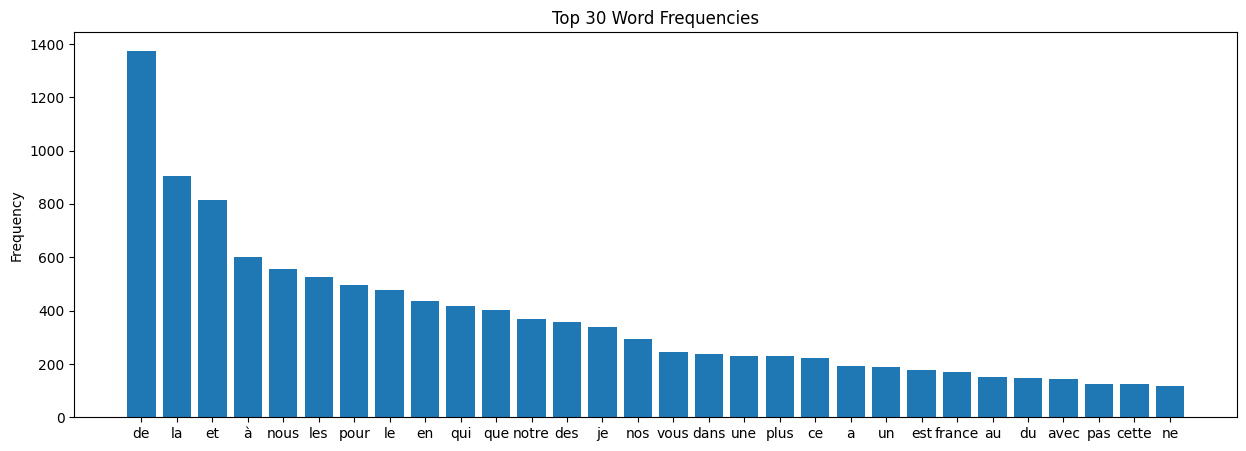

In [8]:
#Q3

import matplotlib.pyplot as plt
N = 30 
top_words_data = freq_mots.most_common(N)

words = [w[0] for w in top_words_data]
counts = [w[1] for w in top_words_data]

plt.figure(figsize=(15, 5))
plt.bar(words, counts)

plt.title(f"Top {N} Word Frequencies")
plt.ylabel("Frequency")
plt.show()


4. Combien de mots n'apparraissent qu'une seule fois ? On appelle ces mots des hapax (hapax legomena)
- Votre réponse
  
3. Afficher les 10 n-grammes (de 1 à 3) les plus fréquent (la bibliothèque `nltk` permet cela) pour l'ensemble du corpus et par président.

In [9]:
nombre_hapax = list(freq_mots.values()).count(1)
total_vocabulaire = len(freq_mots)

print(f"Nombre d'hapax : {nombre_hapax}")

Nombre d'hapax : 2055


In [15]:
from nltk import ngrams
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))
stops = {'les', 'des', 'une', 'aux', 'pour', 'dans', 'par', 'plus', 'fait', 'être', 'avoir', 'cette', 'tous', 'nous', 'vous', 'avec', 'sans'}
stop_words.update(stops)

def get_top_10(tokens_list):
    counts = {}
    for token in tokens_list:
        if token in counts:
            counts[token] += 1  
        else:
            counts[token] = 1  
    sort_list = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    return sort_list[:10]

data = {} 
data['TOTAL'] = []
files = glob('discours_voeux/*.txt')

for file_name in files:
    file_base = os.path.basename(file_name)
    name = file_base.split('.')[0].split('-')[-1]
    with open(file_name, encoding='utf-8') as f:
        text = '\n'.join(f.read().split('\n')[2:])
        clean_tokens = []
        tokens = word_tokenize(text, language='french')
        for w in tokens:
            w = w.lower()
            if w.isalpha() and len(w) > 2 and w not in stop_words:
                clean_tokens.append(w)
    data['TOTAL'].extend(clean_tokens)
    
    # data for each president
    if name not in data:
        data[name] = [] 
    data[name].extend(clean_tokens)


for name, tokens in data.items():
    print(f"\n{'='*15} {name} {'='*15}")
    for n in range(1, 4):
        if len(tokens) < n:
            continue
        grams = list(ngrams(tokens, n))
        top_10 = get_top_10(grams)
        
        print(f"--- Top {n}-gram ---")
        for word_tuple, count in top_10:
            phrase = ' '.join(word_tuple)
            print(f"  {phrase}: {count}")


=============== TOTAL ===============
--- Top 1-gram ---
  france: 169
  aussi: 113
  pays: 97
  faire: 88
  année: 84
  tout: 78
  comme: 76
  ceux: 74
  compatriotes: 69
  travail: 62
--- Top 2-gram ---
  chers compatriotes: 53
  république vive: 16
  vive france: 16
  vive république: 15
  chaque jour: 13
  françaises français: 12
  france chers: 12
  lutte contre: 12
  veux dire: 11
  faire face: 10
--- Top 3-gram ---
  république vive france: 16
  vive république vive: 15
  france chers compatriotes: 12
  vive france chers: 8
  françaises français chers: 6
  français chers compatriotes: 6
  vive france françaises: 6
  france françaises français: 6
  contre réchauffement climatique: 6
  premier ministre gouvernement: 6

=============== Sarkozy ===============
--- Top 1-gram ---
  france: 39
  ceux: 30
  faire: 24
  crise: 24
  chacun: 23
  chers: 22
  compatriotes: 20
  monde: 20
  pays: 17
  année: 15
--- Top 2-gram ---
  chers compatriotes: 18
  veux dire: 5
  ceux perdu: 4
  pe

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gjw20\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4. Afficher les 10 noms, verbes, adverbes et adjectifs les plus fréquents pour l'ensemble du corpus et par président

In [ ]:
# Votre réponse
from nltk import pos_tag
TAG_MAP = {'N': 'Noun', 'V': 'Verb', 'J': 'Adjective', 'R': 'Adverb'}

CORRECTIONS = {
    'faire': 'V',  
    'aussi': 'R',   
    'bien':  'R',   
    'france': 'N', 
    'pays': 'N',   
    'monde': 'N',   
    'grand': 'J',   
    'grande': 'J',  
    'nouveau': 'J', 
    'français': 'N',
    'française': 'N',
    'vouloir': 'V',
    'devoir': 'V',
    'pouvoir': 'V',
    'aller': 'V',
    'avoir': 'V',
    'être': 'V',
    'faire': 'V',
    'compatriotes': 'N',
    'années': 'N',
}

def init_structure():
    return {
        'Noun': [],
        'Verb': [],
        'Adjective': [],
        'Adverb': []
    }

data = {}
data['TOTAL'] = init_structure()

files = glob('discours_voeux/*.txt')
for path in files:
    name = os.path.basename(path).split('.')[0].split('-')[-1]
    if name not in data:
        data[name] = init_structure()
    with open(path, encoding='utf-8') as f:
        text = '\n'.join(f.read().split('\n')[2:]) 
        tokens = [w.lower() for w in word_tokenize(text, language='french') 
                  if w.isalpha() and len(w) > 2 and w.lower() not in stop_words]
        
        for word, tag in pos_tag(tokens):
            first_letter = tag[0] 
            
            if word in CORRECTIONS:
                final_tag_letter = CORRECTIONS[word]
            else:
                final_tag_letter = tag[0]
            if final_tag_letter in TAG_MAP:
                category = TAG_MAP[final_tag_letter]
                data[name][category].append(word)
                data['TOTAL'][category].append(word)

for name, categories in data.items():
    print(f"\n{'='*15} {name} {'='*15}")

    for categ, word_list in categories.items():
        if not word_list: 
            continue

        top_10 = Counter(word_list).most_common(10)
        result = ", ".join([f"{w}({c})" for w, c in top_10])
        print(f">> {categ}: {result}")


=============== TOTAL ===============
>> Noun: france(169), pays(97), compatriotes(69), chers(58), français(50), travail(49), monde(48), chacun(47), année(47), ceux(46)
>> Verb: faire(88), ceux(19), devoir(19), mois(19), toutes(18), pouvoir(17), comme(15), leurs(15), sens(13), entreprises(12)
>> Adjective: vive(31), ensemble(26), année(25), social(20), nouveau(17), comme(17), tant(16), grande(16), nationale(16), contre(15)
>> Adverb: aussi(113), bien(32), encore(23), long(7), lutter(6), relever(4), tout(4), année(4), retrouver(4), hommes(4)

=============== Sarkozy ===============
>> Noun: france(39), chers(22), crise(21), compatriotes(20), monde(20), ceux(20), pays(17), chacun(16), français(14), confiance(11)
>> Verb: faire(24), pouvoir(8), devoir(8), depuis(5), chacun(5), ceux(4), partenaires(4), entreprises(4), réformes(4), pense(3)
>> Adjective: vive(9), nouveau(7), ceux(6), année(5), tant(5), grand(5), faite(4), social(4), vie(3), grande(3)
>> Adverb: bien(13), aussi(7), encore(5

## Byte Pair Encoding

A l'aide de la bibliothèque [`tokenizers`](https://huggingface.co/docs/tokenizers/index) et du code ci-dessous.

1. Comparez la tokenisation en sous-mots du discours de Hollande en 2015 avec les modèles `'camembert/camembert-base'` et `'bert-base-uncased'`.
    - Le modèle camembert à été entraîné sur des données en française et bert-base sur des données anglaises.
    - Quelle différence observez-vous et formulez une hypothèse.
  
- Votre réponse

In [12]:
from tokenizers import Tokenizer
#tokenizer = Tokenizer.from_pretrained(MODELE)

tokenizer_fr = Tokenizer.from_pretrained("camembert-base")

tokenizer_en = Tokenizer.from_pretrained("bert-base-uncased")


In [13]:
#tokenizer.encode(MONTEXTE).tokens
tokens_fr = tokenizer_fr.encode(text).tokens
tokens_en = tokenizer_en.encode(text).tokens

## Spacy

Une autre bibliothèque pour l'analyse de texte est [`spacy`](https://spacy.io/). Sa philosophie est différente de nltk (qui ne travaille qu'avec des listes), avec `spacy` tout est un objet.

1. Installez le modèle français pour spacy
2. Créez une fonction `pretreat_spacy` qui retourne la même chose, mais n'utilise que spacy. Est-ce que toutes les informations sont disponibles ?
3. Y a-t-il des différence dans l'étiquetage morphosyntaxique entre spacy et nltk ?
    - Donnez 3 exemples s'il y en a...

In [24]:
import spacy
nlp = spacy.load("fr_core_news_sm")
def pretreat_spacy(doc_text):
    doc = nlp(doc_text)
    result = []
    for token in doc:
        if not token.is_space:
            result.append((token.text, token.pos_, token.lemma_))
    return result

text_test = "Mes chers compatriotes. Et l'hexagone."
print(pretreat_spacy(text_test))

[('Mes', 'DET', 'mon'), ('chers', 'ADJ', 'cher'), ('compatriotes', 'NOUN', 'compatriote'), ('.', 'PUNCT', '.'), ('Et', 'CCONJ', 'et'), ("l'", 'DET', 'le'), ('hexagone', 'NOUN', 'hexagone'), ('.', 'PUNCT', '.')]


Oui, il y a de grandes différences. NLTK utilise des modèles probabilistes entraînés sur l'anglais, ce qui échoue sur le français. Spacy utilise un modèle statistique entraîné spécifiquement sur le corpus français.

              |  NTLK |   Spacy |  
compatriotes  |  VBZ  |   NOUN  |  
       et     |   FW  |   CCONJ |  
l'hexagone    |   FW  | DET,NOUN |  

# Analyse textuelle

Avec les outils utilisés jusqu'a présent essayez de répondre aux questions suivantes:

5. Comment identifier les thèmes principaux abordés par chaque président ?
6. Y a-t-il des différence importante de vocabulaire entre Sarkozy et Macron ?

### Paquets/commandes utiles:

* Ensembles en python: `vocab = set('a b b b c'.split()))`, ainsi que les intersection `set('abc') & set('bc')`, difference `set('abc') - set('bc')`, combinaison `set('abc') | set('bc')`.
* `collections.Counter`: un dictionnaire qui compte les occurence d'un élement
* Mesurer le temps d'execution d'une commande dans un jupyter notebook

```
%%time  # pour une cellule entière
code python

%time code python # pour une ligne
```

* Pour faire des graphiques
  * [matplotlib](https://matplotlib.org)
  * [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) offre des moyens assez simple de faire des graphiques.
  * [seaborn](https://seaborn.pydata.org) fait de beaux graphiques.

```
# exemple minimal du graphique de la fonction x^2
import matplotlib.pyplot as plt
plt.plot(range(-10, 10), [i**2 for i in range(-10, 10)])
plt.show()
```

- Pour simplifier les traitements utilisez des compréhensions de liste facile à lire.
```python
tmp_list = []
for t in tokens:
    t = t.replace('ü', 'u)
    tmp_list.append(t)
tokens = tmp_list

tokens = [t.replace('ü', 'u') for t in tokens]
```

In [28]:
nlp = spacy.load("fr_core_news_sm")
files = glob('discours_voeux/*.txt')
themes_president = {}
for file_name in files:
    name = os.path.basename(file_name).split('-')[2].replace('.txt', '')
    with open(file_name, encoding='utf-8') as f:
        text = '\n'.join(f.read().split('\n')[2:])
    doc = nlp(text)
    
    if name not in themes_president:
        themes_president[name] = Counter()
    
    # nouns extraction
    nouns = [token.lemma_.lower() for token in doc if token.pos_ == 'NOUN' and len(token.text) > 2]
    themes_president[name].update(nouns)


print(f"\n{'='*20} Themes President (Top Nouns) {'='*20}")

for name, counter in themes_president.items():
    top_nouns = [word for word, count in counter.most_common(15)]
    print(f"\n>>> {name} themes:")
    print(", ".join(top_nouns))


==================== Themes President (Top Nouns) ====================

>>> Sarkozy themes:
année, crise, monde, compatriote, pays, vie, français, emploi, avenir, urgence, travail, réforme, grâce, confiance, difficulté

>>> Hollande themes:
année, pays, emploi, face, compatriote, vie, monde, confiance, entreprise, république, soir, responsabilité, droit, force, avenir

>>> Macron themes:
année, pays, travail, vie, compatriote, nation, mois, soir, engagement, jour, fois, français, an, moment, choix
